In [1]:
from pathlib import Path

from au2v.config import ModelConfig, TrainerConfig
from au2v.dataset_manager import load_dataset_manager
from au2v.trainers import PyTorchTrainer
from au2v.analyst import Analyst
from au2v.model import load_model

/Users/tatsuyaishii/dev/clones/my-doc2vec/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 設定
model_config = ModelConfig()
trainer_config = TrainerConfig()

In [3]:
# データセットのロード
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
)

# 自分でデータセットを作る場合
# `RawDataset`の作り方は`dataset.RawDataset`のコメントを参照
# dataset = dataset.RawDataset(
#     ...
# )
# dataset_manager = DatasetManager(
#     dataset=dataset,
#     window_size=model_config.window_size
# )

load cached dataset_manager from: cache/dataset/toydata-small.pickle


In [4]:
# modelの作成
model = load_model(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config
)

load_state_dict from: cache/model/toydata-small/attentive.pt


In [5]:
# Trainerの作成
trainer = PyTorchTrainer(
    model=model,
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)

In [6]:
# モデルの学習
trainer.fit()

train start


100%|██████████| 71/71 [00:00<00:00, 416.42it/s]


Epoch: 1, loss: 0.2713991428764773, test_loss: {'test': 0.2695866728752432}
saved best model to cache/model/toydata-small/best-attentive.pt


100%|██████████| 71/71 [00:00<00:00, 423.99it/s]


Epoch: 2, loss: 0.26718653591585834, test_loss: {'test': 0.26528946362750633}
saved best model to cache/model/toydata-small/best-attentive.pt


100%|██████████| 71/71 [00:00<00:00, 451.83it/s]

Epoch: 3, loss: 0.2632671817087791, test_loss: {'test': 0.2616591978241021}
saved best model to cache/model/toydata-small/best-attentive.pt
train end
saved model to cache/model/toydata-small/attentive.pt


{'train': [0.2713991428764773, 0.26718653591585834, 0.2632671817087791],
 'test': [0.2695866728752432, 0.26528946362750633, 0.2616591978241021]}

In [7]:
# Analyst（モデルの出力を分析するクラス）インスタンスの作成
analyst = Analyst(model, dataset_manager)

In [8]:
# 系列と要素の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_and_item(seq_index=0, num_recent_items=10)

,similarity,item
0,0.470106,v_1_M_2000
1,0.288426,v_1_E_2000
2,0.123459,v_2_E_2000
3,0.123459,v_2_E_2000
4,0.113570,v_2_F_1990
5,0.010845,v_2_M_1960
6,-0.099424,v_1_M_1980
7,-0.109909,v_1_F_2000
8,-0.204516,v_2_F_2000
9,-0.204516,v_2_F_2000


In [9]:
# 系列と要素の補助情報の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_and_item_meta(seq_index=0, item_meta_name="genre")

,similarity,item_meta
0,0.055380,genre:F
1,-0.122025,genre:E
2,-0.478092,genre:M


In [10]:
# 系列の補助情報と要素の補助情報の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_meta_and_item_meta("gender", "M", "genre")

,similarity,item_meta
0,0.154183,genre:E
1,-0.160568,genre:M
2,-0.320533,genre:F


In [11]:
# 系列と要素の固有の特徴と補助情報の関連性（デフォルトだと内積）の出力
analyst.analyze_seq(seq_index=0)

,similarity,seq,item
0,1.714814,gender:F,genre:F
1,1.211452,age:20,genre:M
2,0.836054,age:20,year:2000
3,0.824594,gender:F,genre:E
4,0.789925,gender:F,year:1990
5,0.663723,gender:F,year:1980
6,0.506109,gender:F,year:1960
7,0.477079,gender:F,year:2000
8,0.350365,u_0_F_20_20_F1,year:1980
9,0.317490,age:20,genre:F


(<Figure size 800x400 with 2 Axes>, <AxesSubplot: >)

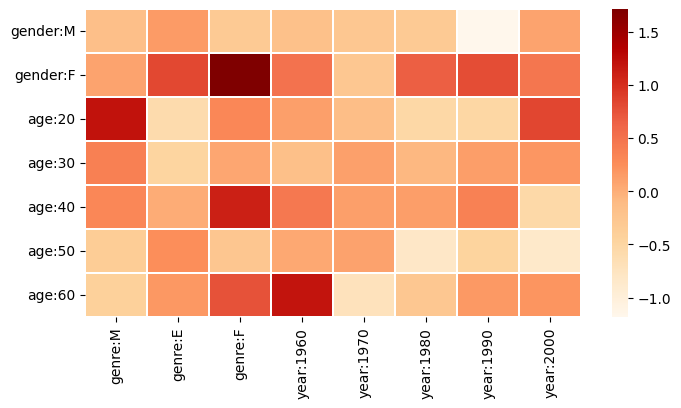

In [12]:
# 補助情報のヒートマップの作成
seq_meta_names = ["gender:M", "gender:F", "age:20", "age:30", "age:40", "age:50", "age:60"]
item_meta_names = ["genre:M", "genre:E", "genre:F", "year:1960", "year:1970", "year:1980", "year:1990", "year:2000"]
analyst.visualize_similarity_heatmap(seq_meta_names, item_meta_names, figsize=(8, 4))